In [21]:
# importing intial libraries for exploring data
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline


In [164]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.utils.vis_utils import plot_model

In [186]:
training_dir="../image_data/cat/train"
validation_dir="../image_data/cat/test"

In [187]:
categories = os.listdir(training_dir)
categories

['patch', 'watery_eye', 'hair_loss', 'apitite_loss', 'tick']

In [188]:
pa_cat = os.path.join(training_dir,categories[0])
pa_cat

'../image_data/cat/train/patch'

In [189]:
img_data = os.listdir(pa_cat)
img_data[:5]

['287.jpg', '640.jpg', '579.jpg', '408.jpg', '881.jpg']

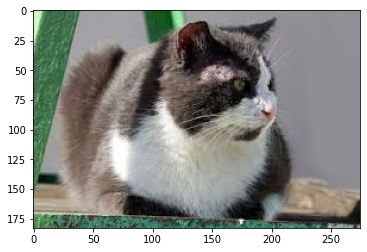

In [190]:
img = plt.imread(os.path.join(pa_cat,img_data[198]))
plt.imshow(img)

In [191]:
len(img_data)

943

In [1]:
def model_with_function():
    
    input_layer = tf.keras.Input(shape=(224,224,3))
    conv1 = Conv2D(64, (3,3), activation='relu')(input_layer)
    pool_1 = MaxPooling2D(2,2)(conv1)
    
    conv2 = Conv2D(128, (3,3), activation='relu')(pool_1)
    pool_2 = MaxPooling2D(2,2)(conv2)
    
    conv3 = Conv2D(128, (3,3), activation ='relu')(pool_2)
    pool_3 = MaxPooling2D(2,2)(conv3)
    
    flatten_layer= tf.keras.layers.Flatten()(pool_3)
    first_dense = tf.keras.layers.Dense(128, activation=tf.nn.relu)(flatten_layer)
    output_layer= tf.keras.layers.Dense(5, activation=tf.nn.softmax)(first_dense)
    
    func_model = Model(inputs=input_layer, outputs=output_layer)
    
    return func_model

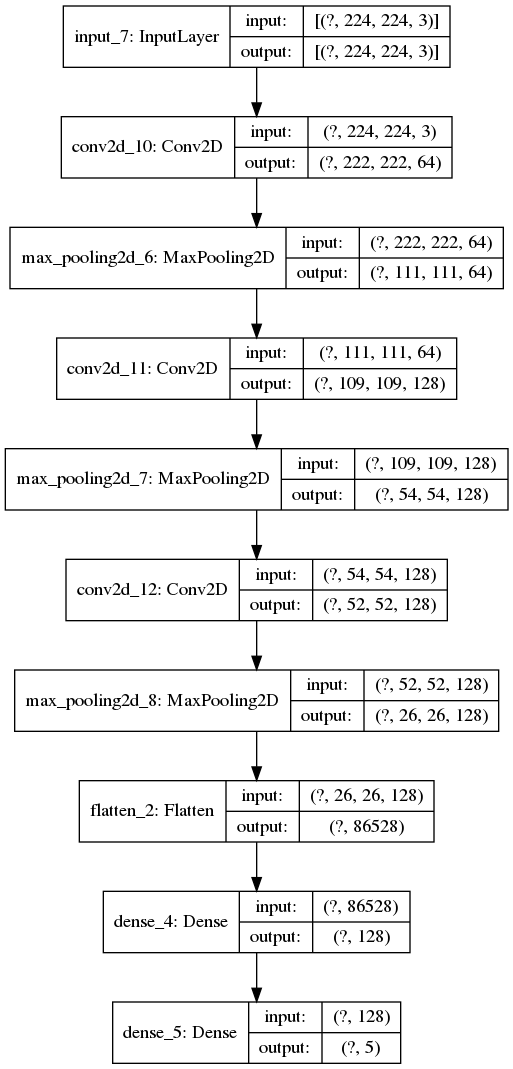

In [176]:
model = model_with_function()

plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')

In [177]:
training_datagen=ImageDataGenerator(
    rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

     
train_generator=training_datagen.flow_from_directory(
    training_dir,
    class_mode='categorical',
    target_size=(224,224))


validation_datagen=ImageDataGenerator(rescale=1./255)

valid_generator=validation_datagen.flow_from_directory(
    validation_dir,
    class_mode='categorical',
    target_size=(224,224))

Found 4498 images belonging to 5 classes.
Found 393 images belonging to 5 classes.


In [181]:
model.compile(optimizer = tf.optimizers.Adam(lr =0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [182]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 109, 109, 128)     73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 54, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 52, 52, 128)       147584    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 26, 26, 128)       0   

In [192]:
checkpoint_path="../checkpoint_cat/cp.ckpt"
checkpoint_dir=os.path.dirname(checkpoint_path)

cp_callback=tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                              save_weights_only=True,
                                              verbose=1)

history=model.fit_generator(train_generator,
                            steps_per_epoch=10,
                            epochs=60,
                            validation_data =valid_generator,
                            verbose=2,
                           callbacks=[cp_callback])   

In [185]:
model.save('cat_model.h5')

INFO:tensorflow:Assets written to: cat_model/assets


In [ ]:
checkpoint_path=r'C:\Users\arora\OneDrive\Documents\train_checkpoint\cp.ckpt'
model.load_weights(checkpoint_path)

In [54]:
import numpy as np
from tensorflow.keras.preprocessing import image
# path = input()
# path =uploaded
path=r"C:\Users\arora\OneDrive\Desktop\12.jpg"
img= image.load_img(path,target_size=(150,150))
x= image.img_to_array(img)
x=np.expand_dims(x, axis=0)

images=np.vstack([x])
classes=model.predict(images, batch_size=10)
print(classes)

[[0. 0. 0. 0. 0. 0. 1.]]


In [18]:
model.labels

AttributeError: 'Sequential' object has no attribute 'labels'